In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d.io import get_tif_tag
from suite3d.io import tiff_utils as tfu
from suite3d import file_utils as flu
import colorcet

from suite3d import nbtools as nbui

/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/paramiko/transport.py:258: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [2]:
subjects_dir =   '/mnt/zortex-subjects/'
expt_info = { 
    'subject':         'SS003',
    'date' :          '2024-08-06',
    'expnum' :         [2]}

tifs, si_params, exp_str = flu.find_exp(subjects_dir, **expt_info, verbose=False)

job_params = {    
    # number of channels recorded in the tiff file, typically 30
    'n_ch_tif' : 26,
    # number of planes in the deeper cavity, typically 15
    'cavity_size' : 13,
    # convert from the Scanimage channel ordering to deep-to-shallow ordering
    # in our case, ScanImage channel numbers are in temporal order. 
    'planes' : n.array([ 0,  2,  4,  6,  8, 10, 12, 14,
                        16, 18, 20, 22, 24, 1,  3, 5,  7,9,11, 13, 15,17,19,21]),
    # number of files to use for the initial pass
    'n_init_files' :   4,
    'fuse_shift_override' : 6,
    'subtract_crosstalk' : True,
    'split_tif_size' : 100,
    
    # volume rate in acquisition
    'fs' : flu.get_si_params(tifs[0])['vol_rate'],
    
    '3d_reg' : False,
    'gpu_reg' : True,
    'nonrigid' : False,
    'save_dtype' : "float16",

    'voxel_size_um' : (20, 3.0, 3.0),
    'cell_filt_type' : 'gaussian',
    'npil_filt_xy_um' :  80,
    'cell_filt_xy_um' :  7.5,
    'sdnorm_exp' :  0.80,
}


job_params['fs'] = si_params['vol_rate']

savedir = os.path.join('/mnt/md0/runs', expt_info['subject'], expt_info['date'])
os.makedirs(savedir, exist_ok=True)

# Create the job
job = Job('/mnt/md0/runs',exp_str + '_2DREG_FULL', tifs = tifs,
          params=job_params, create=True, overwrite=True, verbosity = 3)

Job directory /mnt/md0/runs/s3d-SS003_2024-08-06_2_2DREG_FULL already exists
Loading job directory for SS003_2024-08-06_2_2DREG_FULL in /mnt/md0/runs
   Loading dirs 
      Found dir registered_fused_data
      Found dir summary
      Found dir iters
   Loading default params
      Updating param n_ch_tif
      Updating param cavity_size
      Updating param planes
      Updating param n_init_files
      Updating param fuse_shift_override
      Updating param subtract_crosstalk
      Updating param split_tif_size
      Updating param fs
      Updating param 3d_reg
      Updating param gpu_reg
      Updating param nonrigid
      Updating param save_dtype
      Updating param voxel_size_um
      Updating param cell_filt_type
      Updating param npil_filt_xy_um
      Updating param cell_filt_xy_um
      Updating param sdnorm_exp
   Updated main params file


   Saved a copy of params at /mnt/md0/runs/s3d-SS003_2024-08-06_2_2DREG_FULL/summary
   Updated main params file
Launching initial pass
Saving summary to /mnt/md0/runs/s3d-SS003_2024-08-06_2_2DREG_FULL/summary/summary.npy
   Loading init tifs with 26 channels
      Loading /mnt/zortex-subjects/SS003/2024-08-06/2/2024-08-06_2_SS003_2P_00001_00005.tif
    Loaded file into shared memory in 22.76 sec
    Workers completed in 1.62 sec
    Total time: 24.39 sec
      Loading /mnt/zortex-subjects/SS003/2024-08-06/2/2024-08-06_2_SS003_2P_00001_00009.tif
    Loaded file into shared memory in 23.39 sec
    Workers completed in 2.01 sec
    Total time: 25.40 sec
      Loading /mnt/zortex-subjects/SS003/2024-08-06/2/2024-08-06_2_SS003_2P_00001_00014.tif
    Loaded file into shared memory in 22.95 sec
    Workers completed in 2.51 sec
    Total time: 25.46 sec
      Loading /mnt/zortex-subjects/SS003/2024-08-06/2/2024-08-06_2_SS003_2P_00001_00018.tif
    Loaded file into shared memory in 22.62 sec


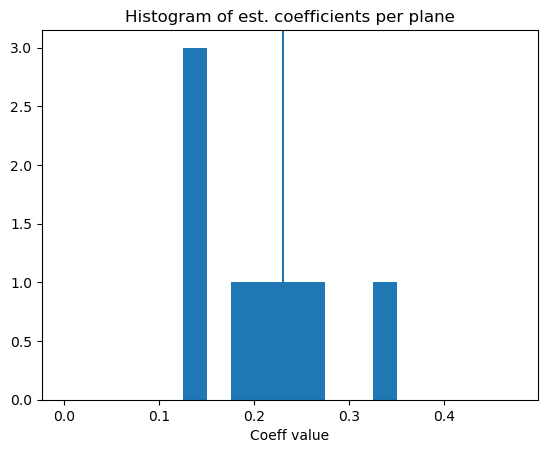

   Subtracting with estimated coefficient 0.230
         Subtracting plane 0 from 13
         Subtracting plane 1 from 14
         Subtracting plane 2 from 15
         Subtracting plane 3 from 16
         Subtracting plane 4 from 17
         Subtracting plane 5 from 18
         Subtracting plane 6 from 19
         Subtracting plane 7 from 20
         Subtracting plane 8 from 21
         Subtracting plane 9 from 22
         Subtracting plane 10 from 23
[{'uid': '9A1B7D0F2A67F484', 'center': array([0, 0]), 'sizeXY': array([ 2.7  , 16.875]), 'pixXY': array([144, 900])}, {'uid': 'D13AC8ABC660883F', 'center': array([2.7, 0. ]), 'sizeXY': array([ 2.7  , 16.875]), 'pixXY': array([144, 900])}, {'uid': '66DCE42C83645264', 'center': array([5.4, 0. ]), 'sizeXY': array([ 2.7  , 16.875]), 'pixXY': array([144, 900])}, {'uid': '18B13E686766C950', 'center': array([0, 0]), 'sizeXY': array([ 2.7  , 16.875]), 'pixXY': array([144, 900])}, {'uid': '305F5B1ABEA43014', 'center': array([-2.7,  0. ]), 'sizeXY'

In [ ]:
job.run_init_pass()

In [ ]:
job.params['nonrigid']

In [ ]:
%%time
job.register(tifs=job.tifs)

In [6]:
job.calculate_corr_map()

   Created dir /mnt/md0/runs/s3d-SS003_2024-08-06_2_2DREG_FULL/corrmap with tag corrmap
      Updating self.dirs tag corrmap
   Created dir /mnt/md0/runs/s3d-SS003_2024-08-06_2_2DREG_FULL/mov_sub with tag mov_sub
      Updating self.dirs tag mov_sub
   Saved a copy of params at /mnt/md0/runs/s3d-SS003_2024-08-06_2_2DREG_FULL/corrmap
   Updated main params file
   Computing correlation map of movie with 2100 frames, volume shape: 24, 937, 720
      Running batch 1 of 11
         Timer prep completed in 9.532 sec
         Timer batch_setup completed in 3.019 sec
         Timer batch_edgecrop completed in 0.241 sec
         Timer accum_meanmeax completed in 2.703 sec
         Timer batch_rolling_mean_filt completed in 2.591 sec
         Timer batch_accum_sdmov completed in 7.883 sec
         Timer batch_norm_sdmov completed in 1.320 sec
         Loading movie into shared memory
         Timer dtu_shmem completed in 10.045 sec
         Subtracting neuropil and applying cell filters
       

array([[[9.99999975e-06, 9.99999975e-06, 9.99999975e-06, ...,
         1.01285324e-01, 1.04363136e-01, 1.05542183e-01],
        [9.99999975e-06, 9.99999975e-06, 9.99999975e-06, ...,
         1.00099035e-01, 1.03233241e-01, 1.04395039e-01],
        [9.99999975e-06, 9.99999975e-06, 9.99999975e-06, ...,
         9.65038687e-02, 1.00012280e-01, 1.01115830e-01],
        ...,
        [9.99999975e-06, 9.99999975e-06, 9.99999975e-06, ...,
         9.99999975e-06, 9.99999975e-06, 9.99999975e-06],
        [9.99999975e-06, 9.99999975e-06, 9.99999975e-06, ...,
         9.99999975e-06, 9.99999975e-06, 9.99999975e-06],
        [9.99999975e-06, 9.99999975e-06, 9.99999975e-06, ...,
         9.99999975e-06, 9.99999975e-06, 9.99999975e-06]],

       [[9.99999975e-06, 9.99999975e-06, 9.99999975e-06, ...,
         5.63985370e-02, 5.82759082e-02, 5.92299365e-02],
        [9.99999975e-06, 9.99999975e-06, 9.99999975e-06, ...,
         5.53908050e-02, 5.75277954e-02, 5.84833249e-02],
        [9.99999975e-06, 

In [7]:
from suite3d import extension as ext

In [8]:
corr_map = job.load_corr_map_results()['vmap']
corr_map_thresh = ext.thresh_mask_corr_map(corr_map, thresh_window_size_pix = 51, corrmap_thresh_pct = 60)

In [9]:
job.params['peak_thresh'] = 0.000
job.params['percentile'] = 99
job.params['activity_thresh'] = 20.0
job.params['extend_thresh'] = 0.035
job.params['patch_size_xy'] = (200,200)
job.params['patch_overlap_xy'] = (20,20)
job.params['max_iter'] = 1000
job.params['n_proc_detect'] = 64
job.segment_rois(vmap = corr_map_thresh)

   Created dir /mnt/md0/runs/s3d-SS003_2024-08-06_2_2DREG_FULL/segmentation with tag segmentation
      Updating self.dirs tag segmentation
   Saved a copy of params at /mnt/md0/runs/s3d-SS003_2024-08-06_2_2DREG_FULL/segmentation
   Updated main params file
   Created dir /mnt/md0/runs/s3d-SS003_2024-08-06_2_2DREG_FULL/rois with tag rois
      Updating self.dirs tag rois
   Saving results to /mnt/md0/runs/s3d-SS003_2024-08-06_2_2DREG_FULL/segmentation and /mnt/md0/runs/s3d-SS003_2024-08-06_2_2DREG_FULL/rois 
dict_keys(['max_img', 'mean_img', 'vmap', 'all_params'])
   Detecting from patch 1 / 24
   Created dir /mnt/md0/runs/s3d-SS003_2024-08-06_2_2DREG_FULL/segmentation/patch-0000 with tag segmentation-patch-0000
         Loading 3.76 GB movie to memory, shape: (2100, 24, 200, 200) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 0.000 and Th2: 20.000
         Iter 0000: running 64 ROIs in parallel
         Added 

/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms
/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms


         Added cell 65 at 08, 046, 173, peak: 1.037, thresh: 18.664, 173 frames, 380 pixels
         Added cell 66 at 04, 027, 114, peak: 1.008, thresh: 20.000, 175 frames, 221 pixels
         Added cell 67 at 14, 045, 135, peak: 0.845, thresh: 20.000, 139 frames, 116 pixels
         Added cell 68 at 00, 083, 074, peak: 0.692, thresh: 20.000, 145 frames, 62 pixels
         Added cell 69 at 13, 074, 173, peak: 0.642, thresh: 20.000, 84 frames, 109 pixels
         Added cell 70 at 00, 054, 120, peak: 0.631, thresh: 20.000, 69 frames, 92 pixels
         Added cell 71 at 06, 031, 091, peak: 0.622, thresh: 18.472, 85 frames, 101 pixels
         Added cell 72 at 09, 083, 081, peak: 0.612, thresh: 18.520, 97 frames, 174 pixels
         Added cell 73 at 00, 033, 078, peak: 0.606, thresh: 10.800, 41 frames, 16 pixels
         Added cell 74 at 05, 079, 146, peak: 0.604, thresh: 16.220, 104 frames, 263 pixels
         Added cell 75 at 14, 046, 150, peak: 0.604, thresh: 20.000, 41 frames, 613 pixe

/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms


         Added cell 897 at 16, 056, 141, peak: 0.190, thresh: 11.142, 25 frames, 26 pixels
         Added cell 898 at 01, 038, 083, peak: 0.170, thresh: 10.645, 42 frames, 24 pixels
         Added cell 899 at 13, 052, 148, peak: 0.164, thresh: 10.720, 18 frames, 11 pixels
         Added cell 900 at 02, 041, 111, peak: 0.158, thresh: 9.981, 26 frames, 10 pixels
         Added cell 901 at 09, 038, 045, peak: 0.144, thresh: 10.360, 54 frames, 26 pixels
         Added cell 902 at 15, 053, 163, peak: 0.142, thresh: 10.639, 32 frames, 10 pixels
         Added cell 903 at 13, 053, 131, peak: 0.141, thresh: 9.759, 38 frames, 9 pixels
         Added cell 904 at 09, 053, 071, peak: 0.138, thresh: 9.914, 35 frames, 12 pixels
         Added cell 905 at 04, 040, 087, peak: 0.134, thresh: 10.395, 29 frames, 9 pixels
         Added cell 906 at 03, 024, 118, peak: 0.132, thresh: 10.345, 29 frames, 10 pixels
         Added cell 907 at 06, 034, 124, peak: 0.131, thresh: 10.221, 29 frames, 10 pixels
    

/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms


         Added cell 129 at 06, 046, 547, peak: 0.800, thresh: 18.642, 135 frames, 269 pixels
         Added cell 130 at 08, 072, 561, peak: 0.401, thresh: 13.616, 41 frames, 45 pixels
         Added cell 131 at 14, 095, 572, peak: 0.299, thresh: 11.606, 36 frames, 52 pixels
         Added cell 132 at 15, 054, 570, peak: 0.274, thresh: 15.649, 52 frames, 59 pixels
         Added cell 133 at 14, 114, 578, peak: 0.243, thresh: 14.261, 44 frames, 46 pixels
         Added cell 134 at 06, 039, 572, peak: 0.233, thresh: 12.028, 58 frames, 77 pixels
         Added cell 135 at 16, 102, 539, peak: 0.232, thresh: 14.943, 40 frames, 59 pixels
         Added cell 136 at 12, 075, 537, peak: 0.214, thresh: 10.871, 33 frames, 17 pixels
         Added cell 137 at 05, 063, 564, peak: 0.209, thresh: 10.855, 34 frames, 13 pixels
         Added cell 138 at 06, 159, 534, peak: 0.206, thresh: 11.007, 36 frames, 16 pixels
         Added cell 139 at 17, 070, 676, peak: 0.202, thresh: 14.777, 33 frames, 76 pixe

/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms
/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms


         Added cell 1 at 04, 586, 035, peak: 1.266, thresh: 20.000, 224 frames, 361 pixels
         Added cell 2 at 06, 559, 036, peak: 0.989, thresh: 20.000, 181 frames, 158 pixels
         Added cell 3 at 07, 605, 021, peak: 0.813, thresh: 16.806, 246 frames, 173 pixels
         Added cell 4 at 02, 541, 037, peak: 0.718, thresh: 14.943, 143 frames, 125 pixels
         Added cell 5 at 00, 579, 059, peak: 0.599, thresh: 17.172, 95 frames, 178 pixels
         Added cell 6 at 07, 540, 097, peak: 0.553, thresh: 17.660, 82 frames, 219 pixels
         Added cell 7 at 06, 585, 065, peak: 0.543, thresh: 16.356, 87 frames, 172 pixels
         Added cell 8 at 09, 574, 032, peak: 0.535, thresh: 20.000, 67 frames, 123 pixels
         Added cell 9 at 06, 525, 030, peak: 0.490, thresh: 16.967, 98 frames, 122 pixels
         Added cell 10 at 03, 471, 093, peak: 0.465, thresh: 17.729, 64 frames, 190 pixels
         Added cell 11 at 13, 614, 012, peak: 0.457, thresh: 17.406, 186 frames, 66 pixels
    

/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms


         Iter 0002: running 64 ROIs in parallel
         Added cell 129 at 06, 562, 036, peak: 0.415, thresh: 11.557, 37 frames, 26 pixels
         Added cell 130 at 06, 606, 025, peak: 0.382, thresh: 10.963, 1 frames, 896 pixels
         Added cell 131 at 06, 591, 059, peak: 0.379, thresh: 16.288, 50 frames, 111 pixels
         Added cell 132 at 05, 589, 032, peak: 0.354, thresh: 10.087, 22 frames, 11 pixels
         Added cell 133 at 08, 580, 033, peak: 0.293, thresh: 15.148, 76 frames, 87 pixels
         Added cell 134 at 06, 556, 055, peak: 0.283, thresh: 14.307, 68 frames, 83 pixels
         Added cell 135 at 05, 524, 035, peak: 0.266, thresh: 12.528, 70 frames, 71 pixels
         Added cell 136 at 02, 540, 041, peak: 0.240, thresh: 9.871, 36 frames, 18 pixels
         Added cell 137 at 05, 606, 067, peak: 0.231, thresh: 11.893, 45 frames, 86 pixels
         Added cell 138 at 07, 512, 063, peak: 0.230, thresh: 12.392, 34 frames, 31 pixels
         Added cell 139 at 04, 571, 061, p

/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms


         Added cell 193 at 05, 591, 036, peak: 0.335, thresh: 10.834, 52 frames, 42 pixels
         Added cell 194 at 06, 606, 028, peak: 0.335, thresh: 13.799, 48 frames, 54 pixels
         Added cell 195 at 06, 555, 036, peak: 0.289, thresh: 10.270, 38 frames, 10 pixels
         Added cell 196 at 06, 520, 044, peak: 0.264, thresh: 15.069, 50 frames, 96 pixels
         Added cell 197 at 06, 552, 065, peak: 0.257, thresh: 14.546, 38 frames, 116 pixels
         Added cell 198 at 04, 569, 065, peak: 0.251, thresh: 10.505, 31 frames, 21 pixels
         Added cell 199 at 08, 576, 027, peak: 0.247, thresh: 11.636, 54 frames, 56 pixels
         Added cell 200 at 05, 591, 064, peak: 0.239, thresh: 14.385, 36 frames, 83 pixels
         Added cell 201 at 01, 538, 038, peak: 0.234, thresh: 10.264, 38 frames, 20 pixels
         Added cell 202 at 08, 582, 072, peak: 0.233, thresh: 10.316, 46 frames, 37 pixels
         Added cell 203 at 06, 501, 064, peak: 0.206, thresh: 13.638, 37 frames, 31 pixel

/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms


         Added cell 193 at 07, 621, 027, peak: 0.361, thresh: 15.387, 43 frames, 682 pixels
         Added cell 194 at 05, 639, 043, peak: 0.350, thresh: 14.924, 54 frames, 92 pixels
         Added cell 195 at 06, 622, 043, peak: 0.288, thresh: 14.755, 48 frames, 151 pixels
         Added cell 196 at 13, 620, 012, peak: 0.204, thresh: 10.618, 22 frames, 11 pixels
         Added cell 197 at 05, 645, 065, peak: 0.191, thresh: 10.227, 33 frames, 11 pixels
         Added cell 198 at 01, 638, 044, peak: 0.185, thresh: 10.461, 27 frames, 11 pixels
         Added cell 199 at 08, 637, 046, peak: 0.184, thresh: 10.345, 39 frames, 18 pixels
         Added cell 200 at 03, 620, 045, peak: 0.153, thresh: 11.253, 26 frames, 19 pixels
         Added cell 201 at 02, 728, 039, peak: 0.148, thresh: 11.452, 55 frames, 79 pixels
         Added cell 202 at 02, 661, 052, peak: 0.147, thresh: 10.678, 34 frames, 15 pixels
         Added cell 203 at 13, 696, 044, peak: 0.140, thresh: 9.831, 61 frames, 31 pixel

/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms


         Added cell 641 at 03, 638, 038, peak: 0.149, thresh: 10.613, 26 frames, 27 pixels
         Added cell 642 at 02, 656, 047, peak: 0.140, thresh: 9.888, 34 frames, 11 pixels
         Added cell 643 at 06, 640, 039, peak: 0.127, thresh: 10.223, 33 frames, 10 pixels
         Added cell 644 at 04, 649, 071, peak: 0.124, thresh: 10.363, 32 frames, 14 pixels
         Added cell 645 at 05, 620, 038, peak: 0.122, thresh: 10.558, 29 frames, 9 pixels
         Added cell 646 at 07, 623, 022, peak: 0.112, thresh: 10.147, 37 frames, 650 pixels
         Added cell 647 at 05, 657, 032, peak: 0.096, thresh: 10.067, 38 frames, 11 pixels
         Added cell 648 at 05, 626, 056, peak: 0.094, thresh: 11.109, 30 frames, 17 pixels
         Added cell 649 at 12, 623, 012, peak: 0.086, thresh: 9.758, 40 frames, 8 pixels
         Added cell 650 at 14, 658, 056, peak: 0.074, thresh: 10.214, 28 frames, 11 pixels
         Added cell 651 at 03, 627, 071, peak: 0.074, thresh: 10.093, 48 frames, 23 pixels
  

/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms


         Added cell 129 at 16, 783, 044, peak: 0.085, thresh: 10.918, 25 frames, 9 pixels
         Added cell 130 at 19, 797, 094, peak: 0.076, thresh: 10.967, 30 frames, 15 pixels
         Added cell 131 at 13, 881, 054, peak: 0.071, thresh: 13.162, 29 frames, 22 pixels
         Added cell 132 at 16, 767, 039, peak: 0.067, thresh: 11.411, 31 frames, 30 pixels
         Added cell 133 at 19, 775, 052, peak: 0.067, thresh: 10.672, 22 frames, 9 pixels
         Added cell 134 at 19, 896, 062, peak: 0.059, thresh: 9.762, 42 frames, 9 pixels
         Added cell 135 at 15, 798, 047, peak: 0.057, thresh: 9.683, 54 frames, 12 pixels
         Added cell 136 at 03, 883, 090, peak: 0.053, thresh: 10.831, 34 frames, 13 pixels
         Added cell 137 at 19, 866, 034, peak: 0.052, thresh: 9.793, 34 frames, 11 pixels
         Added cell 138 at 15, 907, 022, peak: 0.052, thresh: 11.712, 25 frames, 28 pixels
         Added cell 139 at 03, 893, 180, peak: 0.050, thresh: 10.090, 42 frames, 11 pixels
     

/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms


         Added cell 385 at 15, 773, 467, peak: 0.363, thresh: 20.000, 38 frames, 46 pixels
         Added cell 386 at 13, 798, 457, peak: 0.299, thresh: 10.735, 34 frames, 18 pixels
         Added cell 387 at 14, 831, 455, peak: 0.255, thresh: 15.558, 50 frames, 63 pixels
         Added cell 388 at 13, 771, 444, peak: 0.251, thresh: 20.000, 30 frames, 39 pixels
         Added cell 389 at 14, 801, 493, peak: 0.247, thresh: 10.695, 123 frames, 46 pixels
         Added cell 390 at 16, 808, 438, peak: 0.245, thresh: 9.742, 43 frames, 14 pixels
         Added cell 391 at 14, 792, 473, peak: 0.222, thresh: 12.308, 36 frames, 51 pixels
         Added cell 392 at 13, 815, 451, peak: 0.196, thresh: 10.386, 91 frames, 65 pixels
         Added cell 393 at 13, 791, 436, peak: 0.193, thresh: 13.223, 44 frames, 55 pixels
         Added cell 394 at 01, 804, 449, peak: 0.188, thresh: 9.539, 39 frames, 14 pixels
         Added cell 395 at 13, 784, 495, peak: 0.183, thresh: 9.786, 39 frames, 9 pixels
  

/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms


         Added cell 1 at 02, 893, 607, peak: 1.063, thresh: 20.000, 213 frames, 272 pixels
         Added cell 2 at 06, 888, 580, peak: 0.896, thresh: 20.000, 130 frames, 300 pixels
         Added cell 3 at 05, 853, 575, peak: 0.802, thresh: 20.000, 120 frames, 186 pixels
         Added cell 4 at 00, 819, 638, peak: 0.784, thresh: 19.475, 139 frames, 71 pixels
         Added cell 5 at 14, 920, 555, peak: 0.771, thresh: 20.000, 97 frames, 103 pixels
         Added cell 6 at 13, 893, 563, peak: 0.761, thresh: 20.000, 119 frames, 95 pixels
         Added cell 7 at 13, 885, 588, peak: 0.754, thresh: 20.000, 110 frames, 131 pixels
         Added cell 8 at 00, 876, 571, peak: 0.703, thresh: 17.893, 99 frames, 74 pixels
         Added cell 9 at 14, 918, 571, peak: 0.677, thresh: 20.000, 69 frames, 116 pixels
         Added cell 10 at 14, 890, 615, peak: 0.664, thresh: 20.000, 123 frames, 84 pixels
         Added cell 11 at 05, 904, 605, peak: 0.651, thresh: 16.366, 172 frames, 85 pixels
     

/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms
/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms


         Added cell 65 at 15, 922, 564, peak: 0.567, thresh: 20.000, 100 frames, 66 pixels
         Added cell 66 at 14, 886, 582, peak: 0.545, thresh: 20.000, 76 frames, 111 pixels
         Added cell 67 at 14, 826, 630, peak: 0.532, thresh: 20.000, 69 frames, 116 pixels
         Added cell 68 at 03, 898, 603, peak: 0.476, thresh: 20.000, 16 frames, 716 pixels
         Added cell 69 at 13, 922, 579, peak: 0.469, thresh: 20.000, 59 frames, 72 pixels
         Added cell 70 at 00, 819, 635, peak: 0.434, thresh: 11.544, 97 frames, 45 pixels
         Added cell 71 at 06, 893, 644, peak: 0.413, thresh: 18.867, 46 frames, 80 pixels
         Added cell 72 at 03, 890, 620, peak: 0.410, thresh: 15.764, 95 frames, 85 pixels
         Added cell 73 at 14, 906, 623, peak: 0.409, thresh: 20.000, 67 frames, 50 pixels
         Added cell 74 at 06, 905, 613, peak: 0.394, thresh: 17.416, 9 frames, 573 pixels
         Added cell 75 at 14, 897, 597, peak: 0.393, thresh: 20.000, 61 frames, 70 pixels
      

/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms


         Added cell 129 at 02, 895, 609, peak: 0.430, thresh: 12.114, 39 frames, 45 pixels
         Added cell 130 at 13, 926, 587, peak: 0.368, thresh: 16.168, 70 frames, 44 pixels
         Added cell 131 at 07, 858, 642, peak: 0.346, thresh: 18.436, 84 frames, 68 pixels
         Added cell 132 at 13, 862, 614, peak: 0.341, thresh: 17.695, 42 frames, 55 pixels
         Added cell 133 at 13, 903, 573, peak: 0.333, thresh: 17.431, 24 frames, 67 pixels
         Added cell 134 at 13, 886, 621, peak: 0.326, thresh: 20.000, 53 frames, 29 pixels
         Added cell 135 at 13, 927, 541, peak: 0.309, thresh: 18.587, 53 frames, 46 pixels
         Added cell 136 at 02, 860, 589, peak: 0.306, thresh: 12.965, 66 frames, 133 pixels
         Added cell 137 at 01, 816, 638, peak: 0.298, thresh: 10.195, 43 frames, 15 pixels
         Added cell 138 at 15, 841, 617, peak: 0.294, thresh: 15.997, 45 frames, 61 pixels
         Added cell 139 at 14, 901, 545, peak: 0.293, thresh: 19.396, 48 frames, 53 pixel

/home/ali/packages/s2p-lbm/suite3d/extension.py:581: RuntimeWarning: invalid value encountered in divide
  frac_candidate_variance_on_roi = candidate_proj_on_roi / candidate_norms


         Added cell 449 at 13, 920, 593, peak: 0.216, thresh: 15.058, 40 frames, 28 pixels
         Added cell 450 at 15, 883, 584, peak: 0.197, thresh: 11.093, 35 frames, 21 pixels
         Added cell 451 at 13, 898, 611, peak: 0.192, thresh: 14.478, 39 frames, 37 pixels
         Added cell 452 at 14, 920, 575, peak: 0.173, thresh: 10.144, 32 frames, 14 pixels
         Added cell 453 at 04, 896, 600, peak: 0.166, thresh: 10.814, 188 frames, 602 pixels
         Added cell 454 at 15, 838, 616, peak: 0.154, thresh: 12.835, 43 frames, 47 pixels
         Added cell 455 at 12, 893, 627, peak: 0.152, thresh: 11.574, 36 frames, 28 pixels
         Added cell 456 at 14, 857, 606, peak: 0.149, thresh: 10.619, 30 frames, 14 pixels
         Added cell 457 at 13, 901, 564, peak: 0.148, thresh: 15.126, 33 frames, 58 pixels
         Added cell 458 at 00, 879, 574, peak: 0.144, thresh: 10.252, 31 frames, 6 pixels
         Added cell 459 at 13, 866, 577, peak: 0.138, thresh: 12.891, 26 frames, 38 pixel

'/mnt/md0/runs/s3d-SS003_2024-08-06_2_2DREG_FULL/rois'

In [9]:
rois = job.load_segmentation_results()

      Loading from /mnt/md0/runs/s3d-SS003_2024-08-06_2/rois/info.npy
      Loading from /mnt/md0/runs/s3d-SS003_2024-08-06_2/rois/stats.npy
      Loading from /mnt/md0/runs/s3d-SS003_2024-08-06_2/rois/iscell.npy


In [10]:
# job.compute_npil_masks(stats_dir = job.dirs['rois'])

In [11]:
traces = job.extract_and_deconvolve(stats_dir=job.dirs['rois'],iscell=None)

   Updated main params file
   Movie shape: (24, 2168, 936, 720)
22107
   Extracting 22107 valid cells, and saving cell flags to /mnt/md0/runs/s3d-SS003_2024-08-06_2/rois/iscell_extracted.npy
   Extracting activity
         Will extract in 5 batches of 500
   Saving intermediate results to /mnt/md0/runs/s3d-SS003_2024-08-06_2/rois
   Deconvolving
   Saving to /mnt/md0/runs/s3d-SS003_2024-08-06_2/rois
